# FFT tutorial using numpy (and a bit more on plotting)
* FFT is a linear transform of the data from the time domain to the frequency domain. You can move back and forth without losing any information
* FFT allows you to understand how much activity (power or amplitude) in different frequency bands is in your data - very useful especially for cyclical data like cortical oscillations or other periodic signals in timeseries data (housing market, weather, whatever)...
* Can think about this (a bit loosely) as computing the correlation or dot product between the time domain signal and a series of sinusoids at different frequencies and different phases  

[scipy doc](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)

![nice figure of concept](http://www.spektrumanalizoru.com/images/time_vs_freq1.gif)

![nice animation](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

![moon cycle](http://individual.utoronto.ca/kalendis/lunar/Waxing-Waning-periodic.gif)

![tides](https://www.nauticed.org/images/navclinic/sandiegotide.jpg)

* We can represent the amplitude and the phase of the sinusoid at each frequency by representing it on a complex plane. This is just like a normal X,Y Cartesian plane, but the X axis is a real number and the Y axis is an imaginary number


![polar coordinate interpretation](http://www.secretmango.com/jimb/Whitepapers/fft/notation_2.gif)


[website with nice geometric interpretation of dot product](https://jackschaedler.github.io/circles-sines-signals/dotproduct.html)


Equation for dot product: 
$\sum_{n=0}^{N-1} a[n] \cdot b[n]$

In [5]:
# general modules we'll use
import numpy as np
from numpy import pi  # saves you from typing np.pi
import matplotlib.pyplot as plt

# also define the default font we'll use for figures.
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 24}

# then set the figure attributes
plt.rc('font', **font)

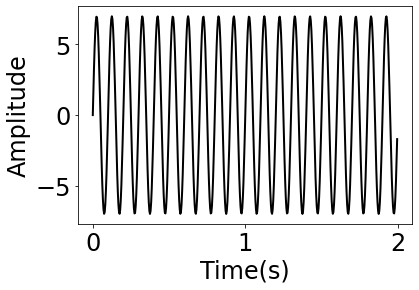

(512,)


In [28]:
sr = 256
f = 10
tmax = 2  # in seconds
dt = 1/sr
t = np.arange(0, tmax, dt)

sw = 7 * np.sin(2*pi*f*t)

plt.plot(t, sw, 'k-', linewidth = 2)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

print(sw.shape)

In [29]:
sp = np.fft.rfft(sw)
sp.shape

(257,)

In [11]:
sp[3]

(1.1739570341808622e-14+3.6883949352083814e-15j)

In [30]:
amp = np.abs(sp)

# normalized amplitude.
amp = (amp / len(sw)) * 2


In [19]:
amp.shape


(257,)

In [31]:
#f_steps = 1/tmax

# x-axis for plotting in the freq domain
f_steps = np.fft.rfftfreq(sw.size, dt)

print(f_steps[2]-f_steps[1])
print(f_steps)

0.5
[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.

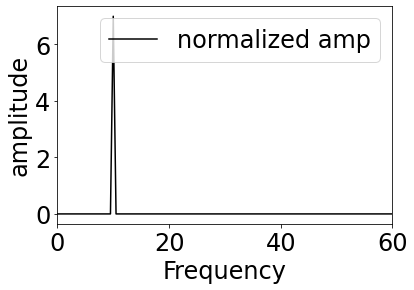

In [33]:
plt.plot(f_steps, amp, 'k')
plt.legend(['normalized amp'], loc='upper right')
plt.xlabel('Frequency')
plt.ylabel('amplitude')
plt.xlim(0,60)
plt.show()

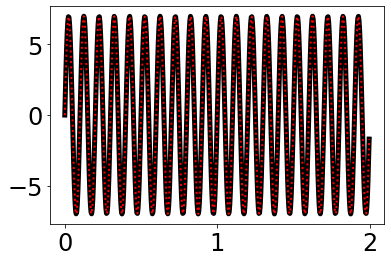

In [35]:
isp = np.fft.irfft(sp)

plt.plot(t, isp, 'k-', linewidth = 5)
plt.plot(t, sw, 'r:', linewidth = 2)

plt.show()

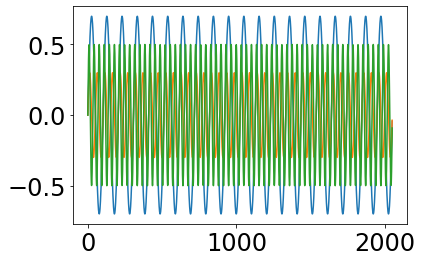

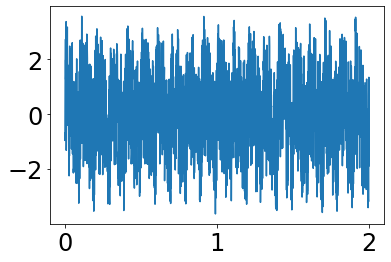

In [41]:
# make a more complex signal
sr = 1024
f = np.array([10,20,30])
amp = np.array([.7,.3,.5])
tmax = 2
dt = 1/sr
t = np.arange(0,tmax,dt)

noise_amp = 5

sw = np.zeros((sr*tmax))

for i in range(len(amp)):
#     plt.plot(amp[i] * np.sin(2*pi*f[i]*t))
    sw += amp[i] * np.sin(2*pi*f[i]*t)

plt.show()

sw += (np.random.rand(len(sw))-0.5) * noise_amp

plt.plot(t, sw)
plt.show()

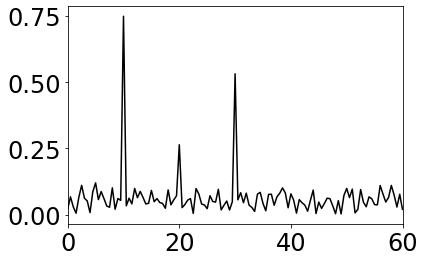

In [42]:
sp = np.fft.rfft(sw)
amp = (np.abs(sp) / len(sw)) * 2

freq_steps = np.fft.rfftfreq(len(sw), dt)

plt.plot(freq_steps, amp, 'k-')
plt.xlim(0,60)
plt.show()